In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils.data_preprocess import *

In [2]:
df = pd.read_csv('./data/ETHBTC-5m-data.csv')

# Data Description

In [3]:
df.describe()

,Open,High,Low,Close,Volume,Close_time,Quote_av,Trades,Tb_base_av,Tb_quote_av,Ignore
count,453585.000000,453585.000000,453585.000000,453585.000000,453585.000000,4.535850e+05,453585.000000,453585.000000,453585.000000,453585.000000,453585.000000
mean,0.043491,0.043558,0.043424,0.043491,718.653703,1.568325e+12,27.862848,679.324755,360.625973,13.966179,12795.232401
std,0.021648,0.021693,0.021603,0.021648,910.194591,3.941484e+10,33.870935,698.043517,485.953773,17.743429,51035.763316
min,0.016169,0.016176,0.016150,0.016167,0.000000,1.500005e+12,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.026324,0.026366,0.026277,0.026323,265.050000,1.534217e+12,9.575858,305.000000,124.415000,4.532919,0.000000
50%,0.033906,0.033944,0.033868,0.033906,474.836000,1.568363e+12,18.389136,480.000000,231.883000,9.032781,0.000000
75%,0.063200,0.063290,0.063113,0.063200,849.491000,1.602451e+12,33.505782,820.000000,425.385000,16.856235,0.000000
max,0.123640,0.123799,0.122851,0.123511,42160.044000,1.636550e+12,1519.571818,26814.000000,25220.191000,734.526422,548463.569977


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453585 entries, 0 to 453584
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Timestamp    453585 non-null  object 
 1   Open         453585 non-null  float64
 2   High         453585 non-null  float64
 3   Low          453585 non-null  float64
 4   Close        453585 non-null  float64
 5   Volume       453585 non-null  float64
 6   Close_time   453585 non-null  float64
 7   Quote_av     453585 non-null  float64
 8   Trades       453585 non-null  float64
 9   Tb_base_av   453585 non-null  float64
 10  Tb_quote_av  453585 non-null  float64
 11  Ignore       453585 non-null  float64
dtypes: float64(11), object(1)
memory usage: 41.5+ MB


Text(0.5, 0, 'Time')

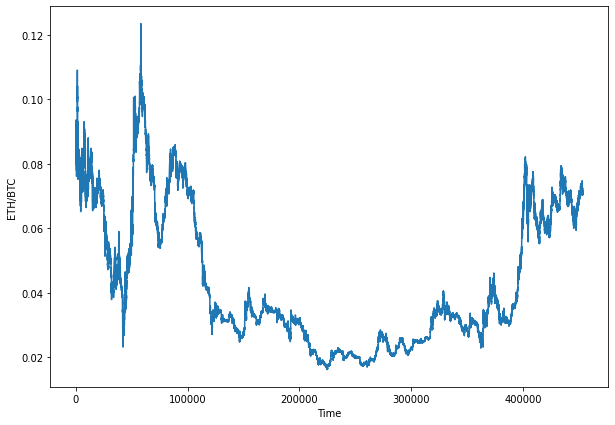

In [5]:
plt.figure(figsize=(10, 7))
plt.plot(df.Close.values)
plt.ylabel('ETH/BTC')
plt.xlabel('Time')

# Caculate Return

In [6]:
raw_data = DataLabeling(df, 24)
target_data = raw_data.labelled_data

In [7]:
target_data['long'] = np.where(target_data['Label'] == 1, 1, 0)
target_data['short'] = np.where(target_data['Label'] == 2, -1, 0)

In [27]:
plt.plot(target_data['Close'])
plt.scatter(target_data['long'], c='green')
plt.scatter(target_data['short'], c='red')
#rotate label if too long
plt.xticks(rotation=60)
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'

In [9]:
Return = df.Close.pct_change(1)

In [10]:
Return

0              NaN
1         0.000012
2         0.079987
3        -0.014722
4         0.010243
            ...   
453580    0.000550
453581   -0.000395
453582    0.001269
453583    0.000704
453584    0.000056
Name: Close, Length: 453585, dtype: float64

In [11]:
cumulative_return = (Return + 1).cumprod()

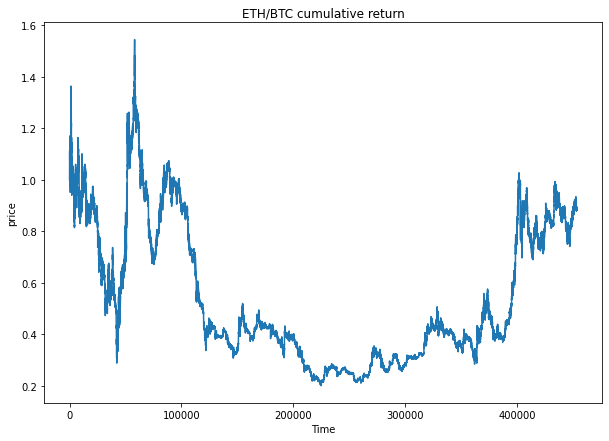

In [12]:
fig = plt.figure(figsize=(10, 7))
plt.plot(cumulative_return)
plt.xlabel('Time')
plt.ylabel('price')
plt.title('ETH/BTC cumulative return')
plt.show()